In [ ]:
from google.colab import files
file=files.upload()

Saving IRIS.csv to IRIS.csv


**-------------------- Importing Required Libraries ---------------------**

In [ ]:
# Handing Arrays
import numpy as np

# Handing Dataframe
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing for ML
from sklearn.preprocessing import LabelEncoder,RobustScaler

# Data spliting & Cross Validation for resampling to remove data imbalancing
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_val_predict

# For multiclass classification handling
from sklearn.multiclass import OneVsRestClassifier

# SMOTE for resampling
from imblearn.over_sampling import SMOTE

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

# Pipeline
from sklearn.pipeline import Pipeline

# Handel Warnings
import warnings
warnings.filterwarnings('ignore')

**-------------------- Data Handling --------------------**

In [ ]:
# Reading data
sp_c=pd.read_csv("IRIS.csv")

# Data Copy
sp=sp_c.copy() # Taking a copy of data for further use

# Data
sp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Data Info
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Checking Null Values
sp.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# Statistical Description of the data
sp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**-------------------- EDA --------------------**

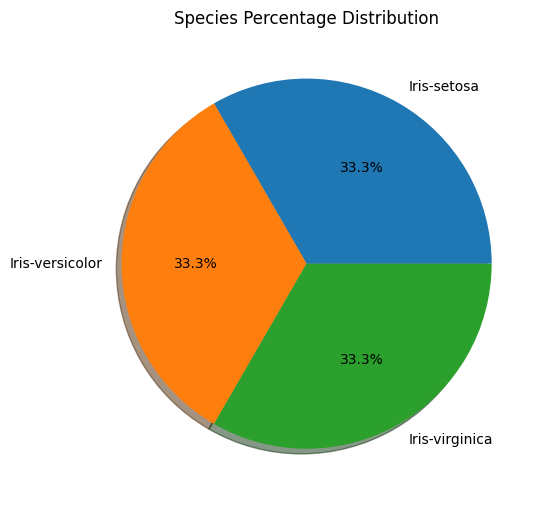

In [ ]:
# Species Distribution
a=sp['species'].value_counts()
lbl=a.index

# plotting pie plot

plt.figure(figsize=(10,9),layout='constrained')

plt.pie(a,labels=lbl,autopct="%.1f%%",shadow=True)
plt.title("Species Percentage Distribution")
plt.show()



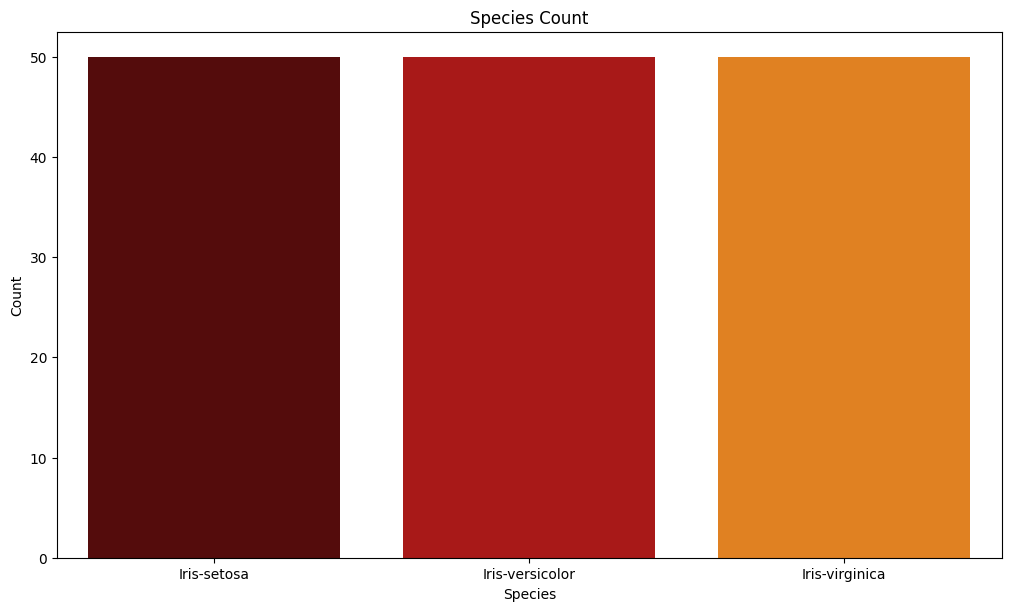

In [ ]:
# plotting countplot

plt.figure(figsize=(10,6),layout='constrained')

sns.countplot(data=sp,x="species",palette="gist_heat")
plt.title("Species Count")
plt.xlabel("Species")
plt.ylabel("Count")

plt.show()

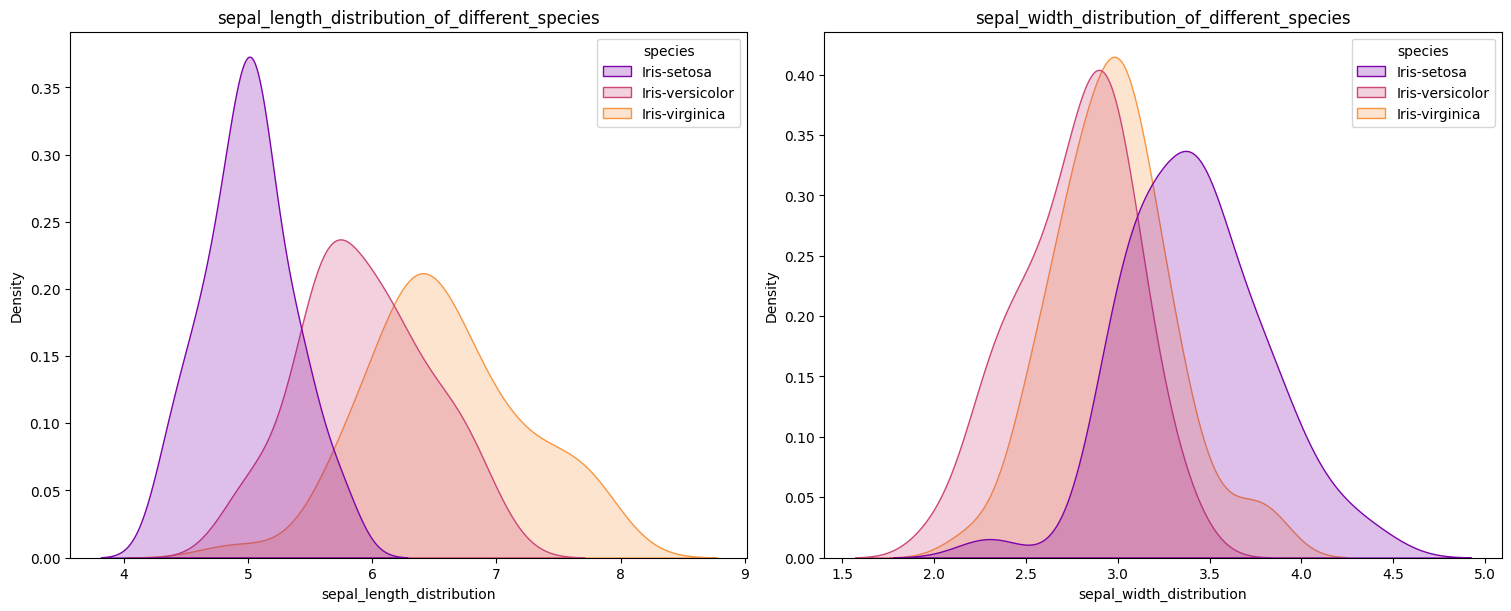

In [ ]:
# Sepal length & width distribution according to species
lst=['sepal_length','sepal_width']
plt.figure(figsize=(15,6),layout='constrained')
for i in range(len(lst)):
  plt.subplot(1,2,i+1)
  plt.title(lst[i]+"_distribution_of_different_species")
  plt.xlabel(lst[i]+"_distribution")
  sns.kdeplot(data=sp,x=lst[i],hue='species',palette='plasma',shade=True)
plt.show()

- From the above visulas we can say that **Iris Setosa** has **sepal length** distribution from 4 to 6 & maximum of it having sepal length 5. And **Iris virginica** has wide range of **sepal length** from 5 to 8.5.
- **Iris Setosa** has wide range of **sepal width** than others.
- So we can say that **Setosa** have wider sepal width & smaller sepal length. **Versicolor** have wider sepal width as well as sepal length. **Virginica** have smaller sepal width & wider sepal length.

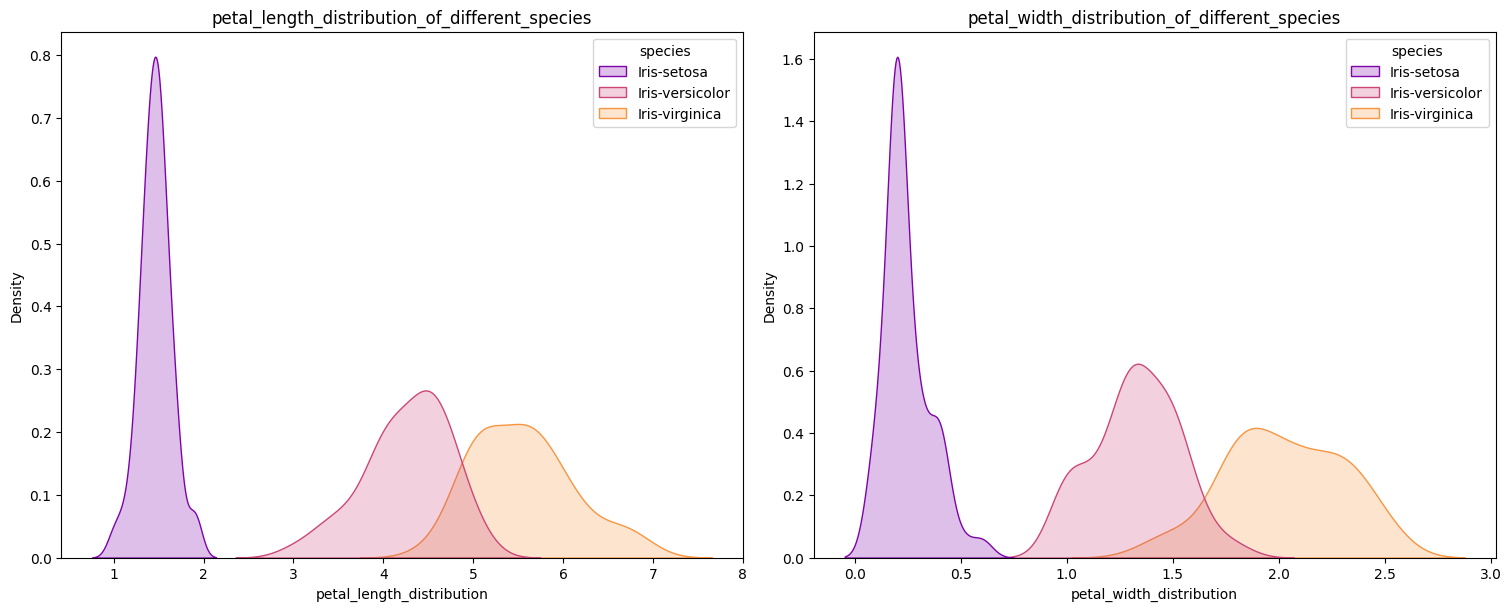

In [ ]:
# Petal length & width distribution according to species
lst=['petal_length','petal_width']
plt.figure(figsize=(15,6),layout='constrained')
for i in range(len(lst)):
  plt.subplot(1,2,i+1)
  plt.title(lst[i]+"_distribution_of_different_species")
  plt.xlabel(lst[i]+"_distribution")
  sns.kdeplot(data=sp,x=lst[i],hue='species',palette='plasma',shade=True)
plt.show()

- From the above visulas we can say that **Setosa** have small petal length & width distribution. **Versicolor** have medium petal length & width distribution. **Virginica** has wider petal length & petal width distribution.

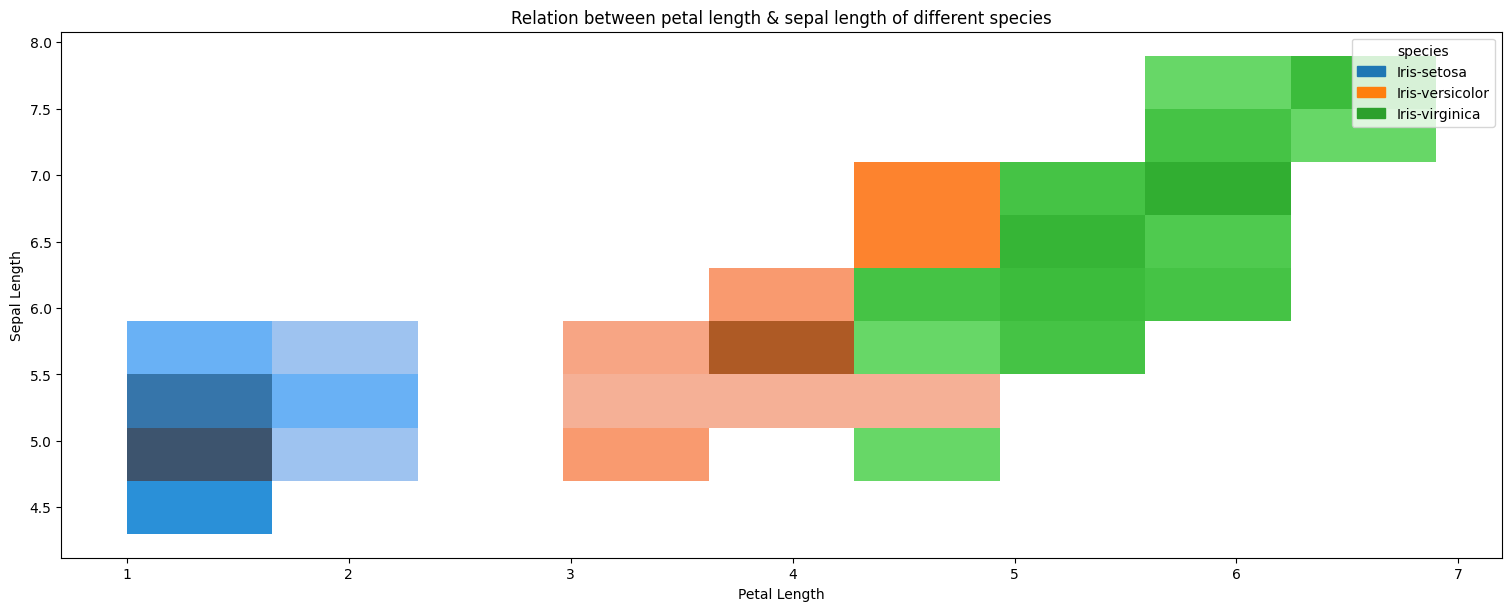

In [ ]:
# Relation between petal length & sepal length of different species
plt.figure(figsize=(15,6),layout='constrained')
plt.title("Relation between petal length & sepal length of different species")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
sns.histplot(data=sp,x='petal_length',y='sepal_length',hue='species')

plt.show()

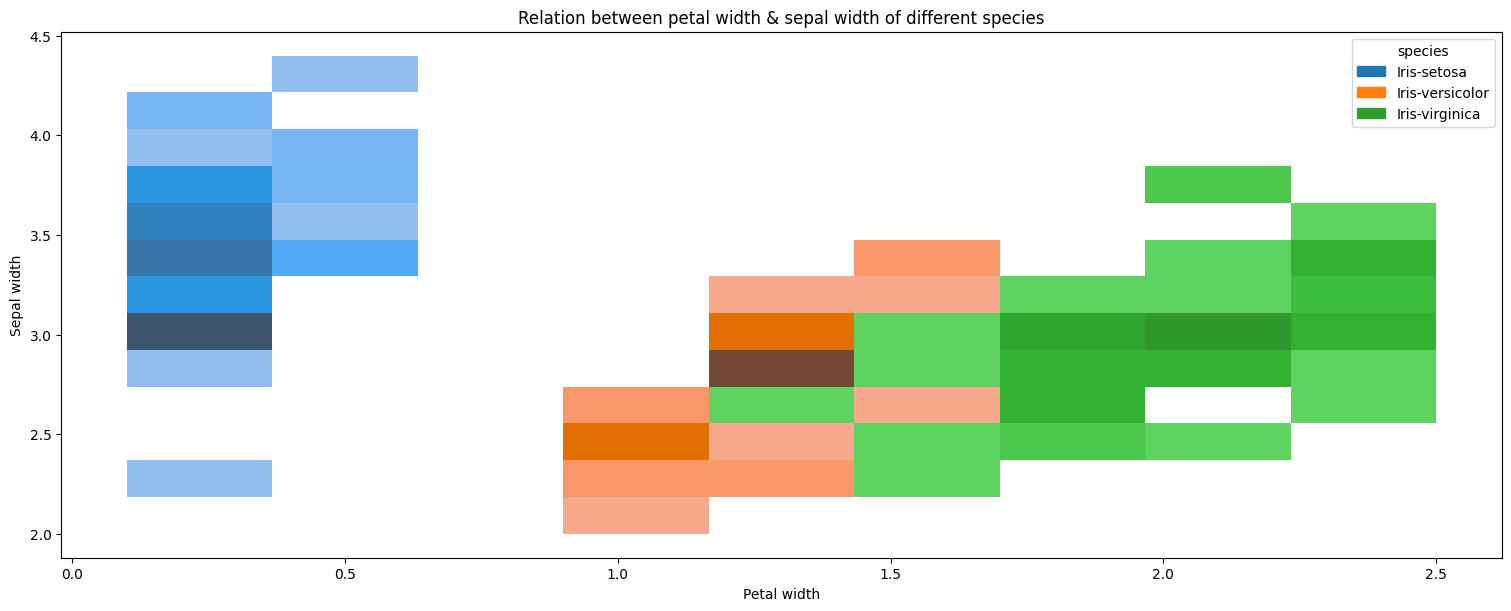

In [ ]:
# Relation between petal width & sepal width of different species
plt.figure(figsize=(15,6),layout='constrained')
plt.title("Relation between petal width & sepal width of different species")
plt.xlabel("Petal width")
plt.ylabel("Sepal width")
sns.histplot(data=sp,x='petal_width',y='sepal_width',hue='species')

plt.show()

**-------------------- Data Preprocessing --------------------**

In [ ]:
# Selecting fetaures and target variable
x=sp.drop('species',axis=1)
y=sp['species']

In [ ]:
# Label Encoding
sp['species_encoder']=LabelEncoder().fit_transform(sp['species'])

# Data Scaling
scl=pd.DataFrame(RobustScaler().fit_transform(x.to_numpy()),columns=x.columns) # Robust scaler is less sensative to outliers

# Data
scl=scl.join(sp['species_encoder'])
scl.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoder
0,-0.538462,1.0,-0.842857,-0.733333,0
1,-0.692308,0.0,-0.842857,-0.733333,0
2,-0.846154,0.4,-0.871429,-0.733333,0
3,-0.923077,0.2,-0.814286,-0.733333,0
4,-0.615385,1.2,-0.842857,-0.733333,0


In [ ]:
# Selecting fetaures and target variable after scaling
x=scl.drop('species_encoder',axis=1)
y=scl['species_encoder']

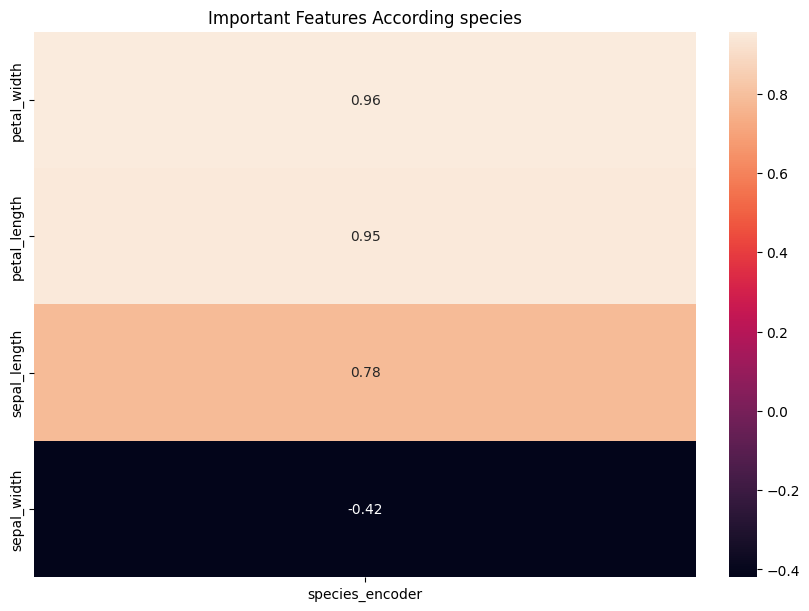

In [ ]:
# Feture importance compared to species
cor=scl.corr()
target=cor['species_encoder'].drop('species_encoder')
target_s=target.sort_values(ascending=False)
plt.figure(figsize=(8,6),layout='constrained')
plt.title('Important Features According species')
sns.heatmap(target_s.to_frame(),annot=True)
plt.show()

In [ ]:
# Data Spliting for training & testing
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

**-------------------- ML Model Building --------------------**

In [ ]:
# Logistic Regression

def mdl_lr(x_train,x_test,y_train,y_test):
  global acc_trn_lr,acc_lr,f1_lr
  lr=LogisticRegression()
  ovr=OneVsRestClassifier(lr) # As logistic regression model is designed to handel binary class classification so here I'm using OneVsRestClassifier to handel multiclass problem
  ovr.fit(x_train,y_train)

  y_pred=ovr.predict(x_test)

  acc_trn_lr=ovr.score(x_train,y_train)
  acc_lr=accuracy_score(y_test,y_pred)
  f1_lr=f1_score(y_test,y_pred,average='weighted')
  conf=confusion_matrix(y_test,y_pred)
  clf=classification_report(y_test,y_pred)

  print("***********Logistic Regression**************")
  print("\n")
  print("Training Accuracy : ",acc_trn_lr)
  print("Testing Accuracy : ",acc_lr)
  print("F1 Score : ",f1_lr)
  print("\n")
  print("Confusion Matrix :\n",conf)
  print("Classification Report :\n",clf)
  print("\n")
  print(15*"=======")

# Decision Tree
def mdl_dt(x_train,x_test,y_train,y_test):
    global acc_trn_dt,acc_dt,f1_dt

    dt=DecisionTreeClassifier(random_state=10)
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)

    acc_trn_dt=dt.score(x_train,y_train)
    acc_dt=accuracy_score(y_test,y_pred)
    f1_dt=f1_score(y_test,y_pred,average='weighted')
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Decision Tree**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_dt)
    print("Testing Accuracy : ",acc_dt)
    print("F1 Score : ",f1_dt)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(15*"=======")

# Random Forest
def mdl_rf(x_train,x_test,y_train,y_test):
    global acc_trn_rf,acc_rf,f1_rf

    rf=RandomForestClassifier(random_state=10)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)

    acc_trn_rf=rf.score(x_train,y_train)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred,average='weighted')
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Random Forest**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_rf)
    print("Testing Accuracy : ",acc_rf)
    print("F1 Score : ",f1_rf)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(15*"=======")

# XG Boost
def mdl_xg(x_train,x_test,y_train,y_test):
    global acc_trn_xg,acc_xg,f1_xg

    xg=XGBClassifier(random_state=10)
    xg.fit(x_train,y_train)
    y_pred=xg.predict(x_test)

    acc_trn_xg=xg.score(x_train,y_train)
    acc_xg=accuracy_score(y_test,y_pred)
    f1_xg=f1_score(y_test,y_pred,average='weighted')
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********XG Boost**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_xg)
    print("Testing Accuracy : ",acc_xg)
    print("F1 Score : ",f1_xg)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(15*"=======")

In [ ]:
# Model Evaluation
mdl_lr(x_train,x_test,y_train,y_test)
mdl_dt(x_train,x_test,y_train,y_test)
mdl_rf(x_train,x_test,y_train,y_test)
mdl_xg(x_train,x_test,y_train,y_test)

***********Logistic Regression**************


Training Accuracy :  0.8857142857142857
Testing Accuracy :  0.8666666666666667
F1 Score :  0.8634343434343436


Confusion Matrix :
 [[19  0  0]
 [ 0  8  5]
 [ 0  1 12]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.89      0.62      0.73        13
           2       0.71      0.92      0.80        13

    accuracy                           0.87        45
   macro avg       0.86      0.85      0.84        45
weighted avg       0.88      0.87      0.86        45



***********Decision Tree**************


Training Accuracy :  1.0
Testing Accuracy :  1.0
F1 Score :  1.0


Confusion Matrix :
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00

In [ ]:
# Model Evaluation Tabular Format
tbl=pd.DataFrame()
tbl['Model']=['Logistic Regression','Decision Tree','Random Forest','X Gradient Boosting']
tbl['Training Accuracy']=[acc_trn_lr,acc_trn_dt,acc_trn_rf,acc_trn_xg]
tbl['Testing Accuracy']=[acc_lr,acc_dt,acc_rf,acc_xg]
tbl['F1 Score']=[f1_lr,f1_dt,f1_rf,f1_xg]

tbl.sort_values('F1 Score',ascending=False,ignore_index=True)

,Model,Training Accuracy,Testing Accuracy,F1 Score
0,Decision Tree,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000
2,X Gradient Boosting,1.000000,1.000000,1.000000
3,Logistic Regression,0.885714,0.866667,0.863434


- According to the above result we can use Random Forest or XGboost model for accurate result.